In [17]:
from os.path import abspath
from pypot.creatures import PoppyTorso

scene_path = abspath('./vrep-sensors/torso_sensors_scene.ttt')
config_path = abspath('./vrep-sensors/torso_vrep_sensors_config.json')
poppy = PoppyTorso(simulator='vrep', scene=scene_path, config=config_path)

In [18]:
# list of loaded sensors
[sensor.name for sensor in poppy.sensors]

[u'Vision_sensor', u'Proximity_sensor', u'floating_camera']

Populating the interactive namespace from numpy and matplotlib
FPS: 25
Resolution: 256x256


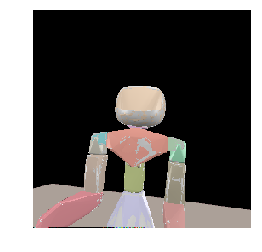

In [19]:
#using a floating vision sensor (floating_camera)
%pylab inline 
# Display the frame from floating_camera
axis('off')
imshow(poppy.floating_camera.frame[:,:,::-1])

print "FPS: " + str(poppy.floating_camera.fps)
res_x, res_y = poppy.floating_camera.resolution
print "Resolution: " + str(res_x) + "x" + str(res_y)

Populating the interactive namespace from numpy and matplotlib
FPS: 25
Resolution: 512x512


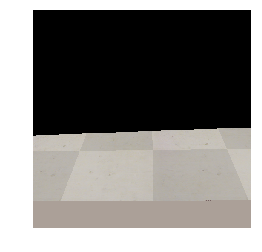

In [20]:
#using a vision sensor on Poppy's head(Vision_sensor)
%pylab inline 
# Display the frame from Vision_sensor
axis('off')
imshow(poppy.Vision_sensor.frame[:,:,::-1])

print "FPS: " + str(poppy.Vision_sensor.fps)
res_x, res_y = poppy.Vision_sensor.resolution
print "Resolution: " + str(res_x) + "x" + str(res_y)

In [21]:
# reading the proximity sensor
(is_object_in_range,
 detected_point,
 detected_object_handle,
 detected_surface_normal_vector) = poppy.Proximity_sensor.scan()

print "Something detected: {}".format(is_object_in_range)

Something detected: False


In [38]:
# move the arm to the detection range of the sensor
poppy.r_shoulder_y.goto_position(-50, 0.5, wait=False)
poppy.r_shoulder_x.goto_position(0, 0.5, wait=False)
poppy.r_arm_z.goto_position(20, 0.5, wait=False)
poppy.r_elbow_y.goto_position(0, 0.5, wait=True)

# reading the proximity sensor
(is_object_in_range,
 detected_point,
 detected_object_handle,
 detected_surface_normal_vector) = poppy.Proximity_sensor.scan()

print "Something detected: {}, at {}, handle {}, surface {}".format(is_object_in_range,
 detected_point,
 detected_object_handle,
 detected_surface_normal_vector)

Something detected: True, at [0.03503983095288277, -0.03180459886789322, 0.17053432762622833], handle 62, surface [-0.6383256316184998, -0.005178053397685289, -0.7697490453720093]


Exception in thread Thread-8:
Traceback (most recent call last):
  File "C:\Users\jruiz\Anaconda2\lib\threading.py", line 801, in __bootstrap_inner
    self.run()
  File "C:\Users\jruiz\Anaconda2\lib\threading.py", line 754, in run
    self.__target(*self.__args, **self.__kwargs)
  File "C:\Users\jruiz\Anaconda2\lib\site-packages\pypot-3.1.0-py2.7.egg\pypot\utils\stoppablethread.py", line 130, in _wrapped_target
    self._target()
  File "C:\Users\jruiz\Anaconda2\lib\site-packages\pypot-3.1.0-py2.7.egg\pypot\utils\stoppablethread.py", line 205, in run
    make_update_loop(self, self._update)
  File "C:\Users\jruiz\Anaconda2\lib\site-packages\pypot-3.1.0-py2.7.egg\pypot\utils\stoppablethread.py", line 183, in make_update_loop
    time.sleep(dt)
  File "C:\Users\jruiz\Anaconda2\lib\site-packages\pypot-3.1.0-py2.7.egg\pypot\vrep\__init__.py", line 46, in sleep
    while (self.get_time() - t0) < t:
  File "C:\Users\jruiz\Anaconda2\lib\site-packages\pypot-3.1.0-py2.7.egg\pypot\vrep\__init__

In [15]:
# stop the simulation and close vrep connection
poppy.stop_and_close_simulation()
